In [152]:
rm(list=ls())
library(data.table)
library(readr)
library(lmtest)
library(DescTools)
library(strucchange)
library(gap)
library(ggplot2)
library(tidyr)


In [93]:
df = df_orig = readr::read_csv("C:/Users/daniel.oliveira/Downloads/ex2_misspecification_gdp.csv")
head(df)

Parsed with column specification:
cols(
  date = col_character(),
  D2000s = col_double(),
  Dea = col_double(),
  ipr = col_double(),
  pr = col_double(),
  sr = col_double(),
  su = col_double(),
  y = col_double()
)


date,D2000s,Dea,ipr,pr,sr,su,y
1/1/1996,0,0,-0.4265874,0.40000000,8.241198,-4.007445,-0.01904023
4/1/1996,0,0,-0.2197676,0.13333333,4.946607,-1.455733,0.77048056
7/1/1996,0,0,0.3352411,0.06666667,-1.752723,1.208689,0.54469339
10/1/1996,0,0,0.3801191,0.13333333,7.017096,3.506695,0.30761525
1/1/1997,0,0,1.1544964,0.23333333,13.832756,2.692859,0.34899919
4/1/1997,0,0,1.8913093,0.06666667,7.967459,2.945239,1.25097564


In [51]:
dim(df)

[1] 70  8

In [52]:
df_est = df[1:50,]
df_fore = df[51:dim(df)[1],]

In [55]:
df_fore

date,D2000s,Dea,ipr,pr,sr,su,y
7/1/2008,0,1,-2.10042728,0.00000000,-13.7905698,-6.7185584,-0.61506471
10/1/2008,0,1,-7.23093227,-0.20000000,-30.4569522,-15.5874664,-1.72452387
1/1/2009,0,1,-10.19533573,0.00000000,-13.1696866,-11.0417475,-2.88021895
4/1/2009,0,1,-1.17303398,0.23333333,9.6375994,4.7682131,-0.28041886
7/1/2009,0,1,2.33246726,-0.13333333,11.5561306,11.1902265,0.39527627
10/1/2009,0,1,1.32536532,0.20000000,7.9768923,8.7638989,0.44712089
1/1/2010,0,1,2.02279861,0.20000000,-0.1095891,4.9602800,0.40563164
4/1/2010,0,1,2.82912936,0.16666667,-2.3295563,2.9629275,0.89268768
7/1/2010,0,1,0.94872634,0.03333333,-0.7887365,3.0405515,0.41400208
10/1/2010,0,1,2.20199598,0.33333333,5.1802215,3.4866797,0.52372301


In [62]:
model2 = lm(y ~ ipr + su + sr, data = df_est)
summary(model2)


Call:
lm(formula = y ~ ipr + su + sr, data = df_est)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5432 -0.1664 -0.0085  0.1828  0.6480 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.365212   0.052841   6.911 1.24e-08 ***
ipr          0.321634   0.068263   4.712 2.30e-05 ***
su          -0.011736   0.021999  -0.533    0.596    
sr           0.007018   0.005286   1.328    0.191    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2617 on 46 degrees of freedom
Multiple R-squared:  0.5087,	Adjusted R-squared:  0.4766 
F-statistic: 15.88 on 3 and 46 DF,  p-value: 3.186e-07


### Breusch-Pagan test - H0: sigma_t = sigma (homoskedasticity) => do not reject H0


In [9]:
bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 2.4511, df = 3, p-value = 0.4842


### White test - H0: sigma_t = sigma (homoskedasticity) => do not reject H0

In [10]:
residuals2_squared = (model2$residuals)^2
ipr_squared = df$ipr^2
su_squared = df$su^2
sr_squared = df$sr^2
df2 = cbind(df, residuals2_squared, ipr_squared, su_squared, sr_squared)
model2_white_adj = lm(residuals2_squared ~ ipr + su + sr + ipr_squared + su_squared + sr_squared, data = df2) 
summary(model2_white_adj)


Call:
lm(formula = residuals2_squared ~ ipr + su + sr + ipr_squared + 
    su_squared + sr_squared, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11647 -0.06299 -0.03539  0.04095  0.46472 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.0633208  0.0189430   3.343   0.0014 **
ipr          0.0110147  0.0168328   0.654   0.5153   
su          -0.0054646  0.0059879  -0.913   0.3649   
sr           0.0029561  0.0019825   1.491   0.1409   
ipr_squared -0.0005696  0.0018238  -0.312   0.7558   
su_squared   0.0003406  0.0005811   0.586   0.5599   
sr_squared   0.0000745  0.0001183   0.630   0.5311   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1084 on 63 degrees of freedom
Multiple R-squared:  0.05703,	Adjusted R-squared:  -0.03277 
F-statistic: 0.6351 on 6 and 63 DF,  p-value: 0.7017


### Durbin watson test - H0: e_t uncorrelated => reject H0

In [13]:
dwtest(model2) 


	Durbin-Watson test

data:  model2
DW = 1.4337, p-value = 0.004866
alternative hypothesis: true autocorrelation is greater than 0


### Jarque-Bera test of normality - H0: skew and kurtosis close to normal => do not reject H0

In [14]:
JarqueBeraTest(model2$residuals)


	Robust Jarque Bera Test

data:  model2$residuals
X-squared = 0.32972, df = 2, p-value = 0.848


### Breusch-Godfrey LM test - H0:     => reject H0

In [16]:
bgtest(model2)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  model2
LM test = 5.0031, df = 1, p-value = 0.0253


### Chow breakpoint test - H0:     => reject H0

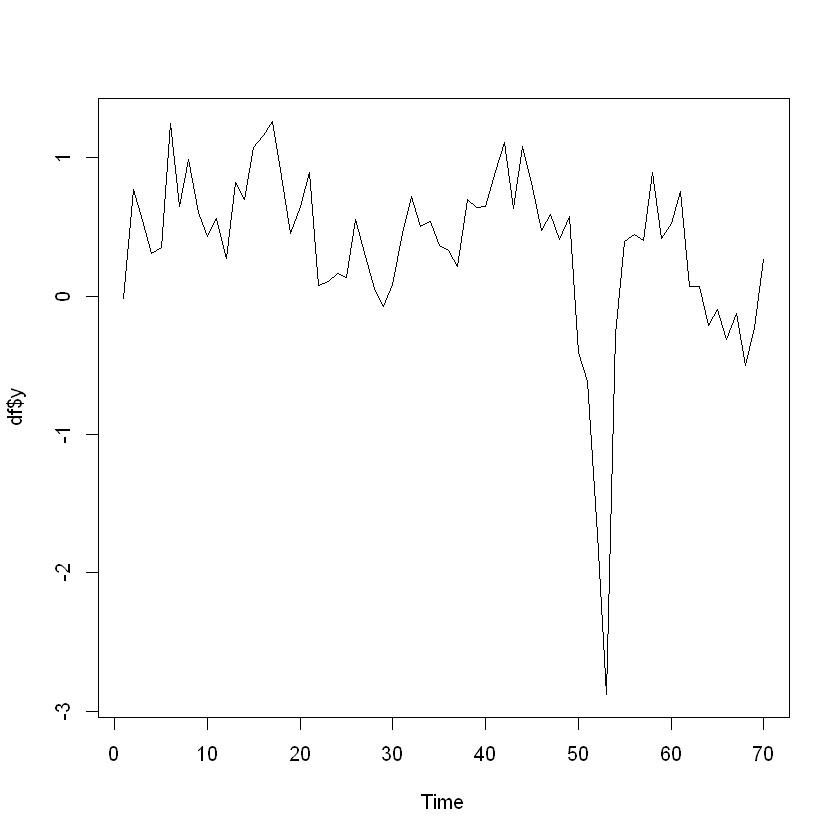

In [17]:
ts.plot(df_est$y)

In [18]:
sctest(y ~ ipr + su + sr, data = df_est, type = 'Chow', from = 50, to = 55)


	Chow test

data:  y ~ ipr + su + sr
F = 2.2577, p-value = 0.07296


### Chow forecast test

In [33]:
df_est1 = df_est[1:25,]
df_est2 = df_est[26:50,]

In [35]:
chow.test(df_est1$y, cbind(df_est1$ipr, df_est1$su, df_est1$sr), df_est2$y, cbind(df_est2$ipr, df_est2$su, df_est2$sr))

F value      d.f.1      d.f.2    P value 
 1.5113058  4.0000000 42.0000000  0.2162498

In [ ]:
### 

In [53]:
model2_D = lm(y ~ D2000s +  ipr + su + sr + D2000s*ipr + D2000s*su + D2000s*sr, data = df_est)
summary(model2_D)


Call:
lm(formula = y ~ D2000s + ipr + su + sr + D2000s * ipr + D2000s * 
    su + D2000s * sr, data = df_est)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54848 -0.14816  0.02646  0.16432  0.50730 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.306385   0.053538   5.723 9.94e-07 ***
D2000s       0.523145   0.205147   2.550   0.0145 *  
ipr          0.396918   0.072041   5.510 2.01e-06 ***
su          -0.014864   0.023049  -0.645   0.5225    
sr           0.004526   0.005252   0.862   0.3937    
D2000s:ipr  -0.474532   0.198359  -2.392   0.0213 *  
D2000s:su    0.124518   0.079825   1.560   0.1263    
D2000s:sr   -0.002443   0.018223  -0.134   0.8940    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.244 on 42 degrees of freedom
Multiple R-squared:  0.6102,	Adjusted R-squared:  0.5452 
F-statistic: 9.393 on 7 and 42 DF,  p-value: 5.933e-07


In [64]:
predit_model2_df = as.data.frame(cbind(df_est$ipr, df_est$su, df_est$sr))
colnames(predit_model2_df) = c('ipr', 'su', 'sr')
predit_model2_D_df = as.data.frame(cbind(df_est$D2000s, df_fore$ipr, df_fore$su, df_fore$sr,
                                       df_fore$ipr*df_est$D2000s, df_fore$su*df_est$D2000s,
                                       df_fore$sr*df_est$D2000s))
colnames(predit_model2_D_df) = c('D2000s', 'ipr', 'su', 'sr', 'D2000s:ipr', 'D2000s:su', 'D2000s:sr')

Warning message in df_fore$ipr * df_est$D2000s:
"longer object length is not a multiple of shorter object length"Warning message in df_fore$su * df_est$D2000s:
"longer object length is not a multiple of shorter object length"Warning message in df_fore$sr * df_est$D2000s:
"longer object length is not a multiple of shorter object length"Warning message in cbind(df_est$D2000s, df_fore$ipr, df_fore$su, df_fore$sr, df_fore$ipr * :
"number of rows of result is not a multiple of vector length (arg 2)"

In [66]:
head(predit_model2_D_df)

D2000s,ipr,su,sr,D2000s:ipr,D2000s:su,D2000s:sr
0,-2.100427,-6.718558,-13.790570,0,0,0
0,-7.230932,-15.587466,-30.456952,0,0,0
0,-10.195336,-11.041747,-13.169687,0,0,0
0,-1.173034,4.768213,9.637599,0,0,0
0,2.332467,11.190226,11.556131,0,0,0
0,1.325365,8.763899,7.976892,0,0,0


In [67]:
yhat = list()
yhat$y = predict(model2, newdata = predit_model2_df) # no dummy
yhat$yD = predict(model2_D, newdata = predit_model2_D_df) # with dummy

yhat$yD.se = sqrt(sum(model2_D$residuals^2) / 198)
yhat$yD.up = yhat$yD + 1.96 * yhat$yD.se
yhat$yD.low = yhat$yD - 1.96 * yhat$yD.se

In [69]:
yhat.plot <- data.table('yhat' = rbindlist(list(data.table(df_fore$y),
                                                data.table(yhat$y),
                                                data.table(yhat$yD))),
                        'label' = rep(c('Y', 'YHAT_OLS', 'YHAT_OLSD'), each = 100))

#ggplot(yhat.plot, aes(x = rep(302:401, 3), y = yhat.plot$yhat.V1, linetype = label)) +
#  geom_line() + xlab('') + ylab('') + theme(legend.title = element_blank()) 

Warning message in data.table(yhat = rbindlist(list(data.table(df_fore$y), data.table(yhat$y), :
"Item 1 is of size 120 but maximum size is 300 (recycled leaving remainder of 60 items)"

In [72]:
yhat_plot_df = cbind(df_fore$y, yhat$y,yhat$yD)
colnames(yhat_plot_df) = c('Y', 'YHAT_OLS', 'YHAT_OLSD')
head(yhat_plot_df)

Warning message in cbind(df_fore$y, yhat$y, yhat$yD):
"number of rows of result is not a multiple of vector length (arg 1)"

Y,YHAT_OLS,YHAT_OLSD
-0.6150647,0.3328780,-0.4898642
-1.7245239,0.3463290,-2.4698597
-2.8802190,0.4465504,-3.6358107
-0.2804189,0.4955662,-0.1864682
0.3952763,0.8020182,1.1181558
0.4471209,0.9948748,0.7382839


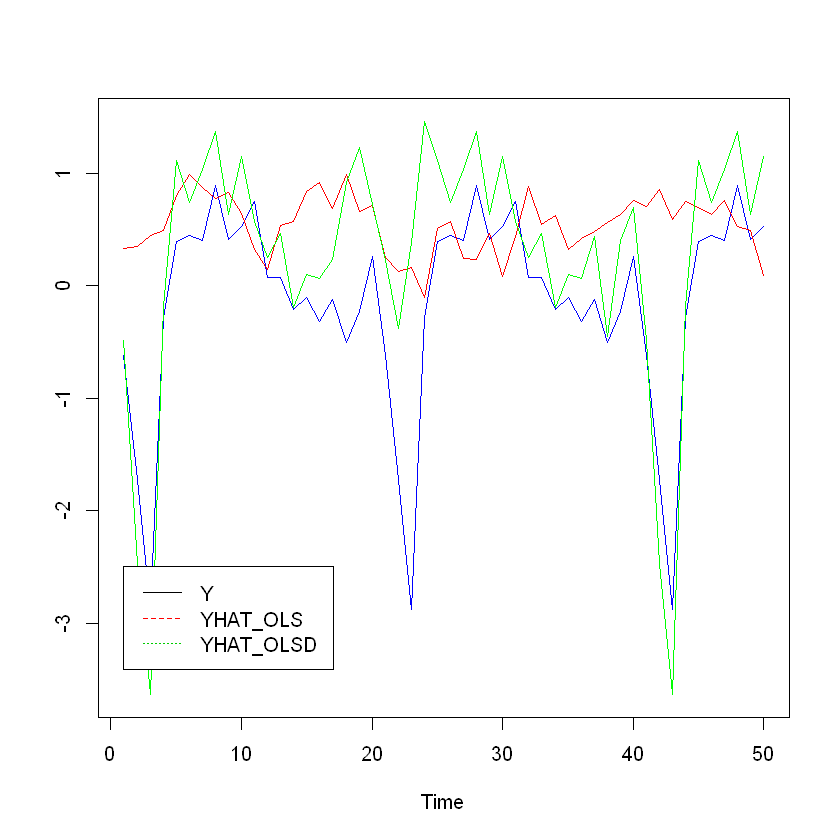

In [86]:
ts.plot(yhat_plot_df, col=c("blue", "red", "green"))
legend(1, -2.5, c("Y", "YHAT_OLS", "YHAT_OLSD"), col = 1:3, lty = 1:3)

In [94]:
df = as.data.frame(cbind(df_orig$ipr, df_orig$su, df_orig$sr))
colnames(df) = c('ipr', 'su', 'sr')
df_y = as.data.frame(cbind(df_orig$y, df_orig$ipr, df_orig$su, df_orig$sr))
colnames(df_y) = c('y', 'ipr', 'su', 'sr')

df_D = as.data.frame(cbind(df_orig$D2000s, df_orig$ipr, df_orig$su, df_orig$sr,
                                       df_orig$ipr*df_orig$D2000s, df_orig$su*df_orig$D2000s,
                                       df_orig$sr*df_orig$D2000s))
colnames(df_D) = c('D2000s', 'ipr', 'su', 'sr', 'D2000s:ipr', 'D2000s:su', 'D2000s:sr')

df_D_y = as.data.frame(cbind(df_orig$y, df_orig$D2000s, df_orig$ipr, df_orig$su, df_orig$sr,
                                       df_orig$ipr*df_orig$D2000s, df_orig$su*df_orig$D2000s,
                                       df_orig$sr*df_orig$D2000s))
colnames(df_D_y) = c('y', 'D2000s', 'ipr', 'su', 'sr', 'D2000s:ipr', 'D2000s:su', 'D2000s:sr')


In [135]:
y_real = list()
for (i in (dim(df_orig)[1]/2):(dim(df_orig)[1]-1)) {
    ols.rec = lm(y ~ ipr + su + sr, data = df_y[1:i,])
    yhat$y.rec[i] = predict(ols.rec, newdata = df_orig[i + 1,])
    y_real[i] = df_y$y[i+1]

    olsD.rec = lm(y ~ D2000s +  ipr + su + sr + D2000s*ipr + D2000s*su + D2000s*sr, data = df_D_y[1:i,])
    yhat$yD.rec[i] <- predict(olsD.rec, newdata = df_D[i + 1,])
    #yhat$yD.recse[i] <- sqrt(sum(olsD.rec$residuals^2) / (197 + i))
}

In [126]:
library(DataCombine)

Warning message:
"package 'DataCombine' was built under R version 3.6.3"
Attaching package: 'DataCombine'

The following object is masked from 'package:data.table':

    shift



In [149]:
yhay_rec_df = cbind(y_real, yhat$y.rec, yhat$yD.rec) %>% as.data.frame() %>% drop_na()
colnames(yhay_rec_df) = c('y_real', 'yhat_rec', 'yhatD_rec')

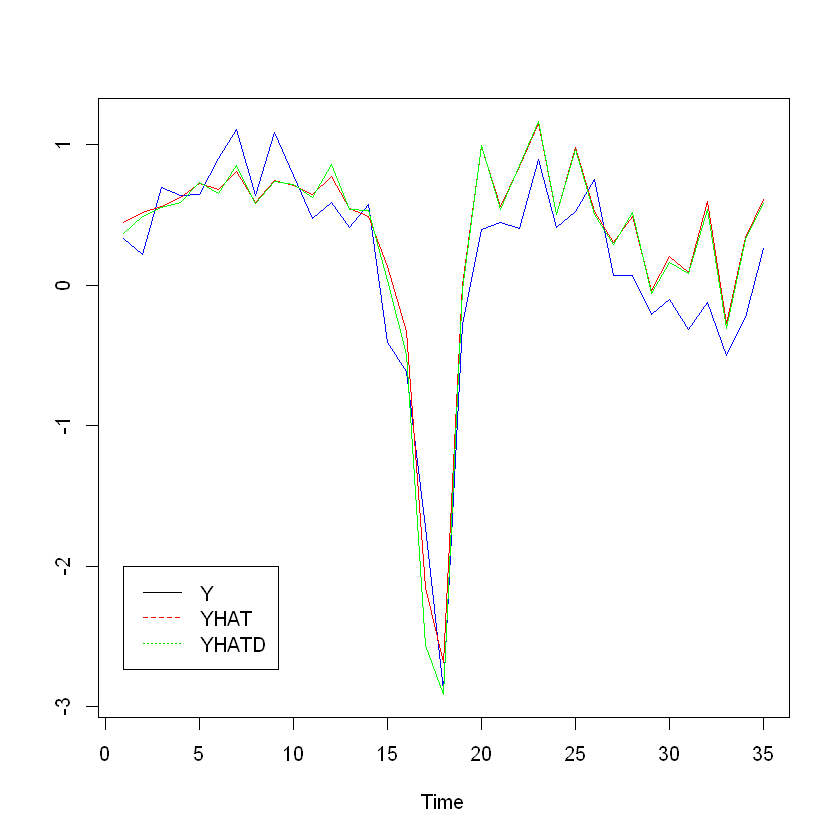

In [151]:
ts.plot(yhay_rec_df, col=c("blue", "red", "green"))
legend(1, -2, c('Y',"YHAT", "YHATD"), col = 1:3, lty = 1:3)